In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
import scipy.stats
import sys
import sys
sys.path.append('..')
sys.path.append('../lib')
from lib import *
from lib.plotting import model_labels as labels
plt.style.use('../peptidome.mplstyle')
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## see https://github.com/andim/peptidome/tree/master/code/maxent for more

In [3]:
df = pd.read_csv('../data/Figure Data/nskewfcov_k9_dkls_pairwise.csv',index_col=0)

In [4]:
# remove plants from analysis, since they are not included in the paper
plants = {'Wheat','Soybean','Rice'}
df = df[~df['proteome'].isin(plants)]
df = df[~df['reference'].isin(plants)]

In [5]:
nattobits = lambda x: x*np.log2(np.exp(1))

In [6]:
df.loc[-1]=({'proteome': 'Uniform','reference':'Uniform','DKL':0.0})

In [7]:
proteomes = list(df['proteome'].unique())
N = len(proteomes)

In [8]:
matrix = np.empty((N,N))
for i in range(N):
    for j in range(N):
        if i==j:
            dkl = 0
        else:
            first = proteomes[i]
            second = proteomes[j]
            dkl = float(df[(df['proteome']==first)&(df['reference']==second)]['DKL'].values[0])
        matrix[i,j] = nattobits(dkl)

                               

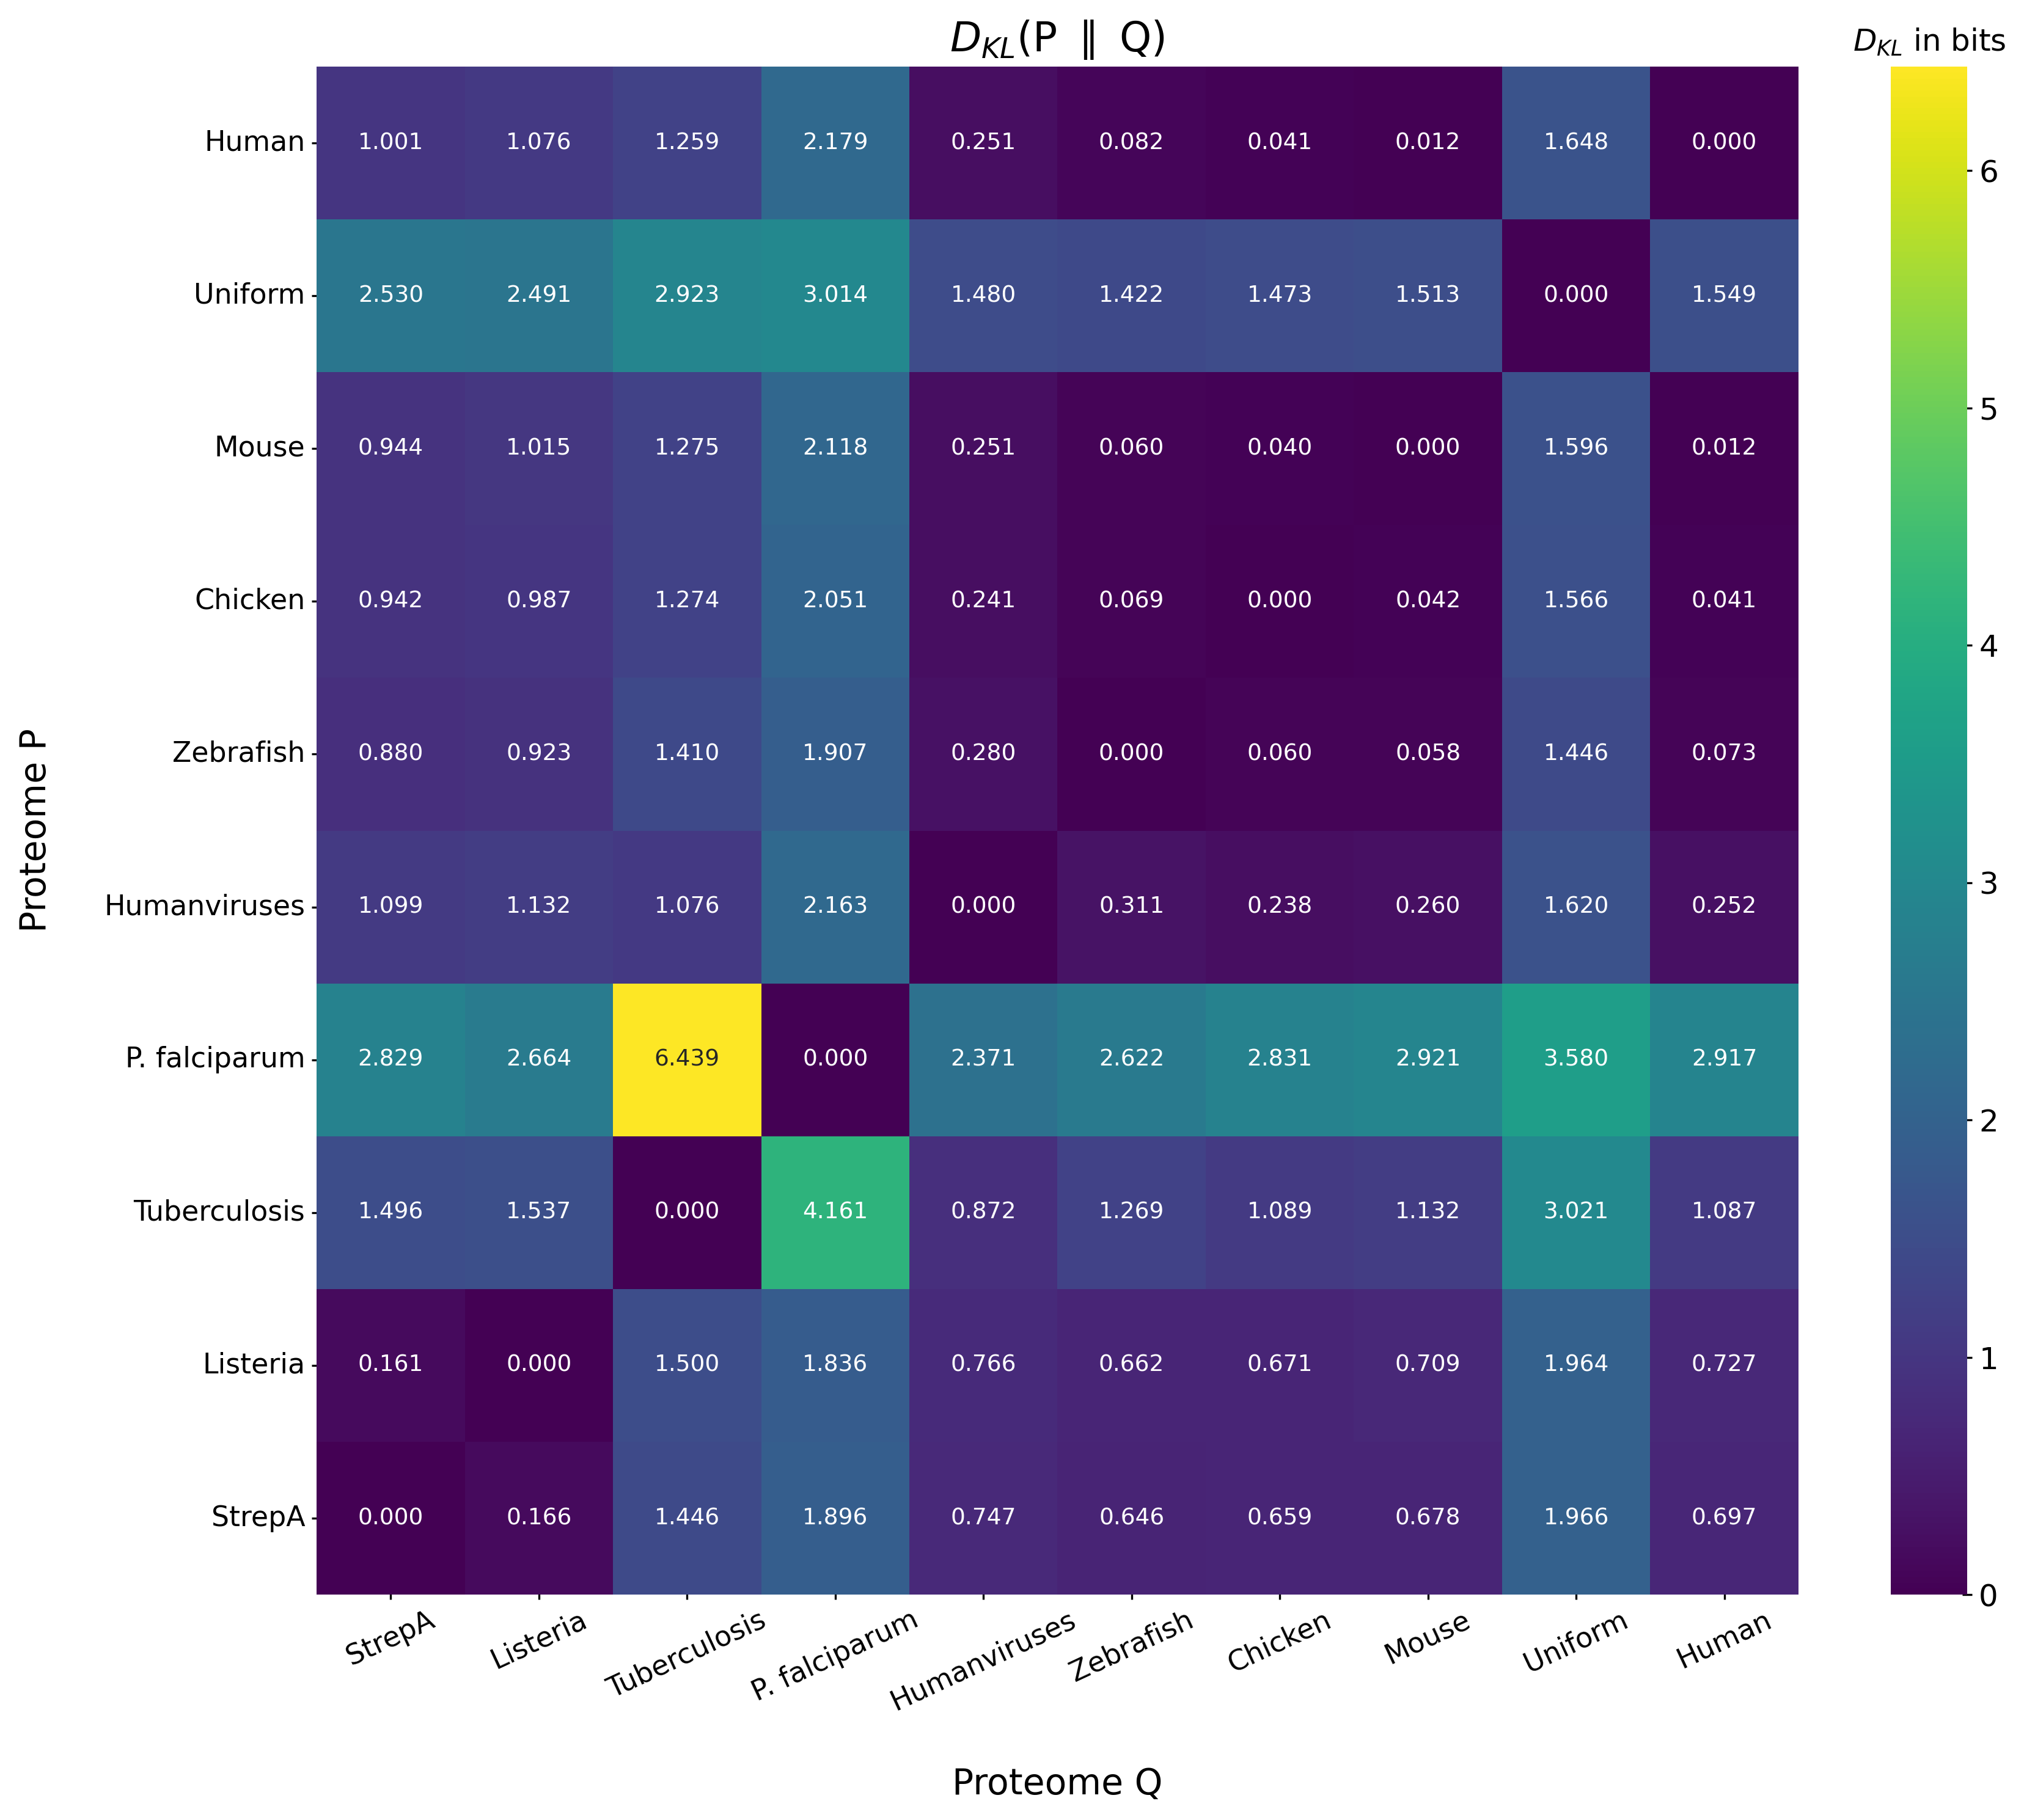

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))

labels = [l if l != 'Malaria' else 'P. falciparum' for l in proteomes ]

sns.heatmap(matrix[:, ::-1],xticklabels=labels[::-1],yticklabels=labels,annot=True,fmt=".3f",ax=ax,cmap="viridis")
ax.tick_params(axis='x', labelsize=11,rotation=25)
ax.tick_params(axis='y', labelsize=11,rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
ax.set_title('$D_{KL}$(P $\\parallel$ Q)',fontsize=16)
cbar.ax.set_title('$D_{KL}$ in bits',fontsize=12)

ax.set_xlabel('Proteome Q',fontsize=14,labelpad=20)
ax.set_ylabel('Proteome P',fontsize=14,labelpad=20)
fig.tight_layout()
# plt.savefig('../dkls_reversed_all.png')
# plt.savefig('../dkls_reversed_all.svg')


In [10]:
from sklearn.manifold import MDS


In [11]:
print('Original Dimension of X : ', matrix.shape)

Original Dimension of X :  (10, 10)


In [12]:
# symmetrize it
J = 0.5 * (matrix + matrix.T)

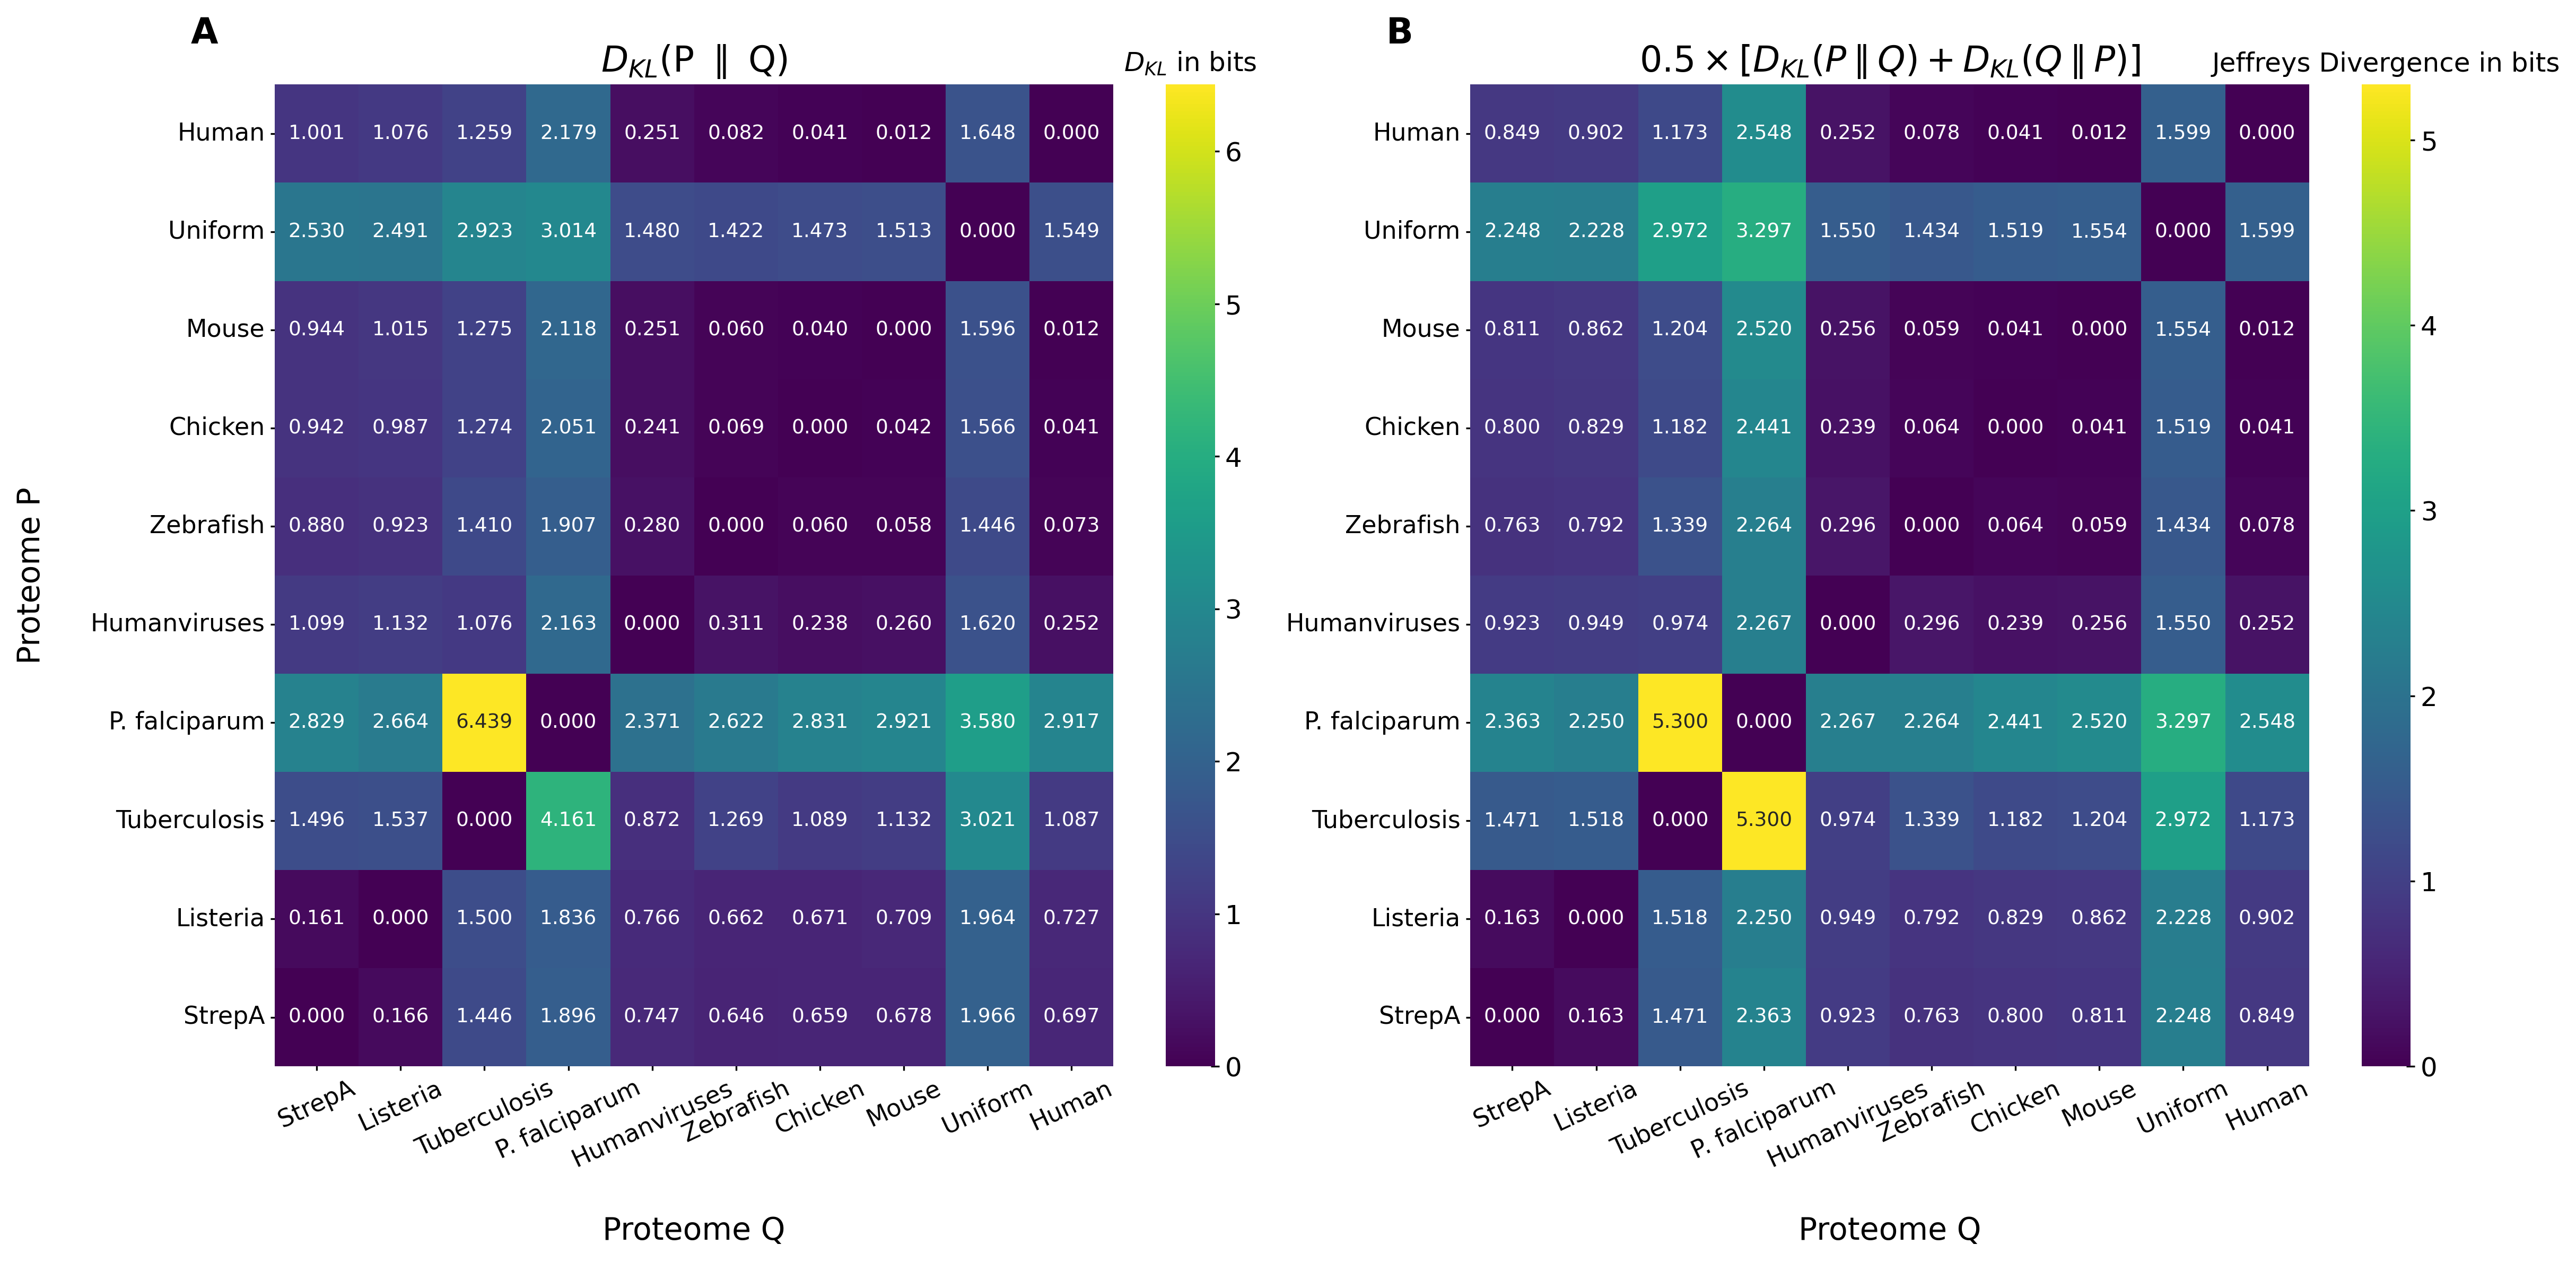

In [13]:
fig, axes = plt.subplots(ncols=2,figsize=(16,8))
label_axes(fig, labelstyle='%s', xy=(-0.1, 1.07),fontsize=16)
ax=axes[0]
labels = [l if l != 'Malaria' else 'P. falciparum' for l in proteomes ]

sns.heatmap(matrix[:, ::-1],xticklabels=labels[::-1],yticklabels=labels,annot=True,fmt=".3f",ax=ax,cmap="viridis")
ax.tick_params(axis='x', labelsize=11,rotation=25)
ax.tick_params(axis='y', labelsize=11,rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
ax.set_title('$D_{KL}$(P $\\parallel$ Q)',fontsize=16)
cbar.ax.set_title('$D_{KL}$ in bits',fontsize=12)

ax.set_xlabel('Proteome Q',fontsize=14,labelpad=20)
ax.set_ylabel('Proteome P',fontsize=14,labelpad=20)


ax=axes[1]
sns.heatmap(J[:, ::-1],xticklabels=labels[::-1],yticklabels=labels,annot=True,fmt=".3f",ax=ax,cmap="viridis")
ax.tick_params(axis='x', labelsize=11,rotation=25)
ax.tick_params(axis='y', labelsize=11,rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
ax.set_title('$ 0.5 \\times [D_{KL}(P \\parallel Q)+D_{KL}(Q \\parallel P)]$',fontsize=16)
cbar.ax.set_title('Jeffreys Divergence in bits',fontsize=12)

ax.set_xlabel('Proteome Q',fontsize=14,labelpad=20)
# ax.set_ylabel('Proteome P',fontsize=14,labelpad=20)



fig.tight_layout()
plt.savefig('../pairwise_dkls_and_jeffreys.png')
# plt.savefig('../dkls_reversed_all.svg')


In [14]:
mds = MDS(n_components=2, random_state=42,dissimilarity="precomputed")

In [15]:
X_2d = mds.fit_transform(J)

In [16]:
print('Dimension of X after MDS : ', X_2d.shape)

Dimension of X after MDS :  (10, 2)


In [17]:
coloring = {
    'Mouse': '#ff7f0e',
    'Chicken': '#2ca02c',
    'Zebrafish': '#d62728',
    'Humanviruses': '#9467bd',
    'Malaria': '#8c564b',
    'Tuberculosis': '#e377c2',
    'Listeria': '#7f7f7f',
    'StrepA': '#bcbd22',
    'Uniform': 'black',
    'Human':'tab:blue'
}


[Text(0, -2.0, ''),
 Text(0, -1.5, ''),
 Text(0, -1.0, ''),
 Text(0, -0.5, ''),
 Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, '')]

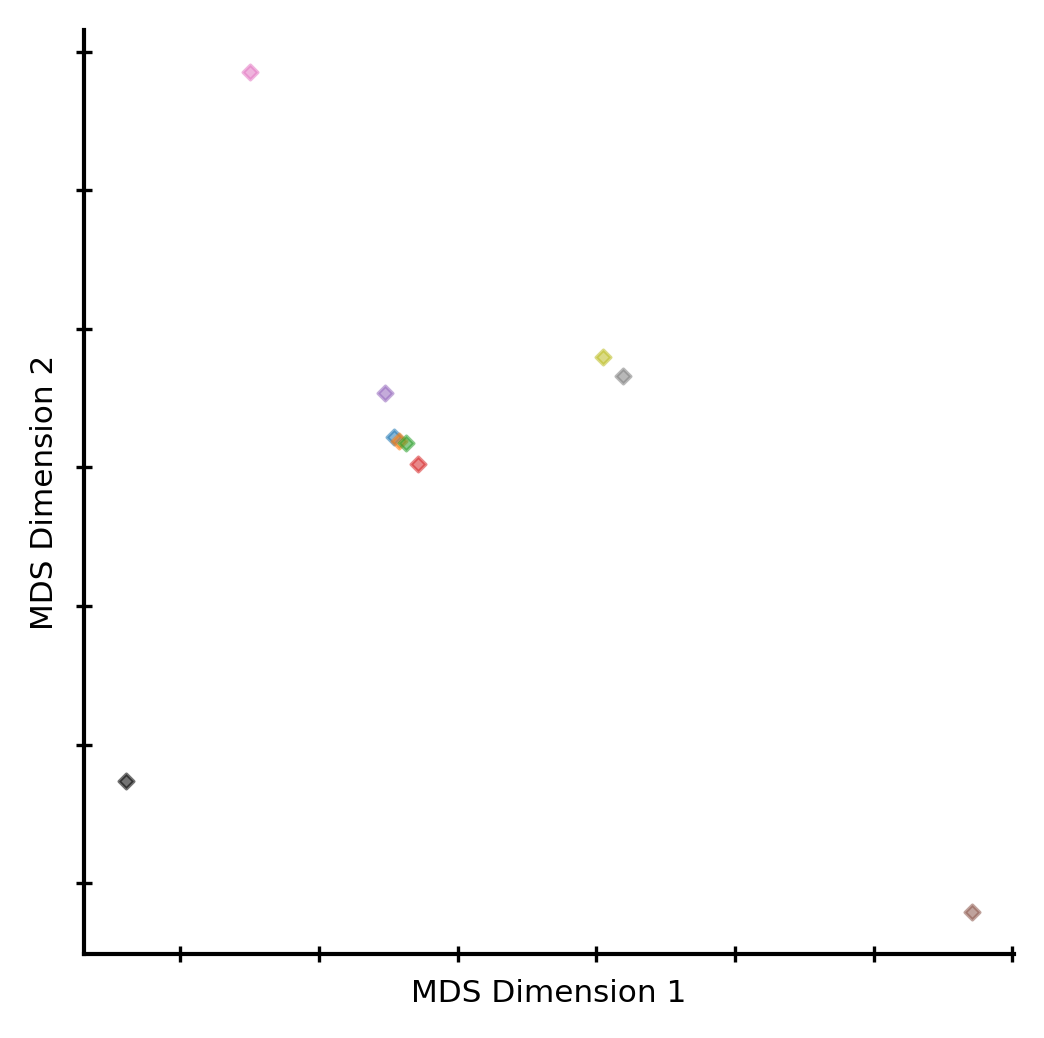

In [18]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(4,4))
L = X_2d.shape[0]

for i in range(L):
    x = X_2d[i,0]
    y = X_2d[i,1]
    ax.scatter(x,y,marker='D',label=labels[i],alpha=.55,color=coloring[proteomes[i]])
ax.set_xlabel("MDS Dimension 1")
ax.set_ylabel("MDS Dimension 2")
# legend_handles = [
#     Line2D([0], [0], color=colors[i], lw=2, label=labels[i],alpha=0.95)
#     for i in range(L)
# ]

# ax.legend(handles=legend_handles,ncols=2)
ax.set_xticklabels([])
ax.set_yticklabels([])

In [19]:
L

10

In [20]:
matrix.shape

(10, 10)

In [22]:
mds.stress_

np.float64(2.876544082397732)